In [1]:
import numpy as np
import matplotlib.pyplot as pl
from matplotlib.offsetbox import AnchoredText

## NNI

In [2]:
result = np.loadtxt('./results/200_amp_ratio=1_ALL.dat')
[SNRtot, SNR200, SNR220, evidence220, evidence200, evidence220_200, nofilter] = result.T
sort_idx = np.argsort(SNRtot)
[SNRtot, SNR200, SNR220, evidence220, evidence200, evidence220_200, nofilter] = result[sort_idx].T

## nofilter

Text(0.5, 1.0, '220+200 NNI injection')

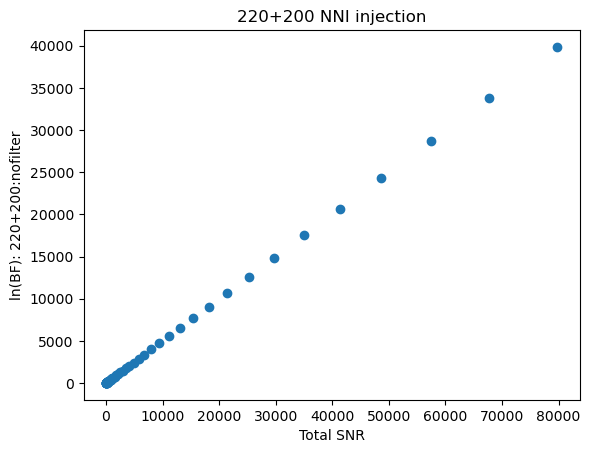

In [3]:
pl.plot(SNRtot**2, evidence220_200 - nofilter, 'o', c='tab:blue')
pl.xlabel("Total SNR")
pl.ylabel("ln(BF): 220+200:nofilter")
pl.title("220+200 NNI injection")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


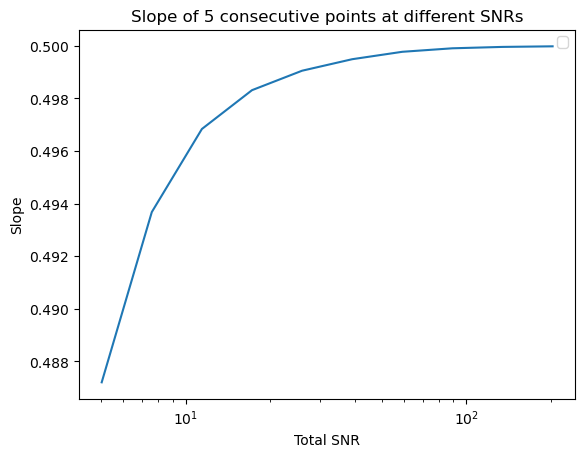

In [4]:
slope_arr = []
for i in range(len(SNRtot)//5):
    slope, _ = np.polyfit((SNRtot**2)[5*i:5*i+5], (evidence220_200 - nofilter)[5*i:5*i+5], deg=1, cov=False)
    slope_arr.append(slope)
pl.semilogx(SNRtot[::5], slope_arr)

pl.title("Slope of 5 consecutive points at different SNRs")
pl.xlabel("Total SNR")
pl.ylabel("Slope")
pl.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


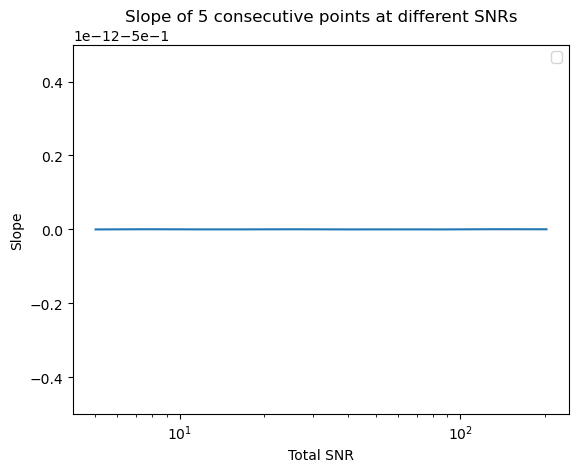

In [5]:
slope_arr = []
sort_idx = np.argsort(SNRtot)
for i in range(len(SNRtot)//5):
    slope, _ = np.polyfit((SNRtot**2)[5*i:5*i+5], nofilter[5*i:5*i+5], deg=1, cov=False)
    slope_arr.append(slope)
pl.semilogx(SNRtot[::5], slope_arr)

pl.title("Slope of 5 consecutive points at different SNRs")
pl.xlabel("Total SNR")
pl.ylabel("Slope")
pl.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


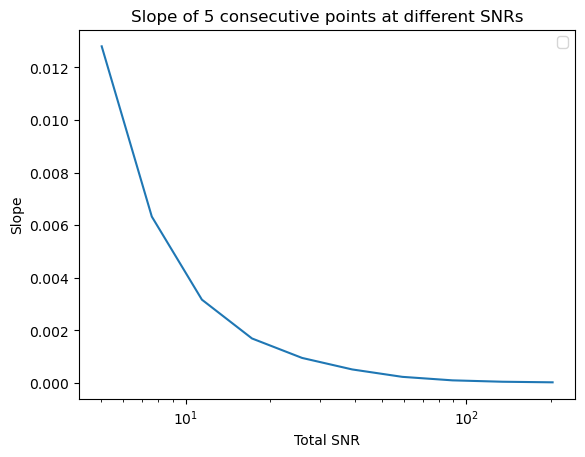

In [6]:
slope_arr = []
sort_idx = np.argsort(SNRtot)
for i in range(len(SNRtot)//5):
    slope, _ = np.polyfit((SNRtot**2)[5*i:5*i+5], -evidence220_200[5*i:5*i+5], deg=1, cov=False)
    slope_arr.append(slope)
pl.semilogx(SNRtot[::5], slope_arr)

pl.title("Slope of 5 consecutive points at different SNRs")
pl.xlabel("Total SNR")
pl.ylabel("Slope")
pl.legend()

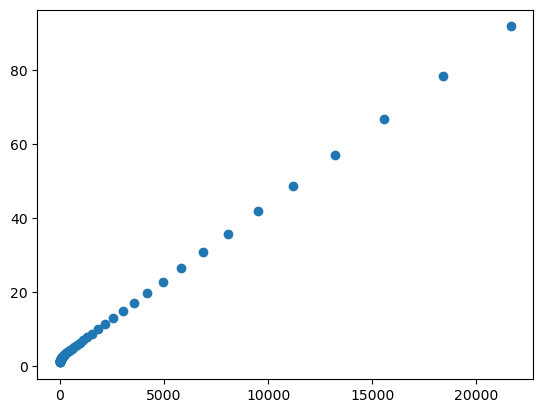

In [62]:
pl.plot(SNR200**2, evidence220_200 - evidence220, 'o', c='tab:blue')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


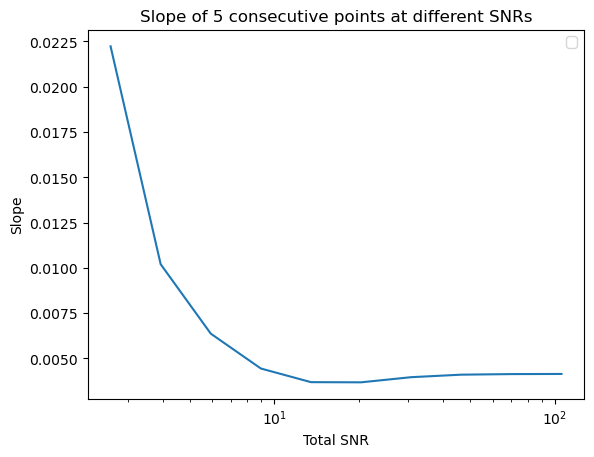

In [9]:
slope_arr = []
for i in range(len(SNRtot)//5):
    slope, _ = np.polyfit((SNR220**2)[5*i:5*i+5], (evidence220_200-evidence200)[5*i:5*i+5], deg=1, cov=False)
    slope_arr.append(slope)
pl.semilogx(SNR220[::5], slope_arr)

pl.title("Slope of 5 consecutive points at different SNRs")
pl.xlabel("Total SNR")
pl.ylabel("Slope")
pl.legend()

In [10]:
slope_arr[-1]

0.004142159986876435

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


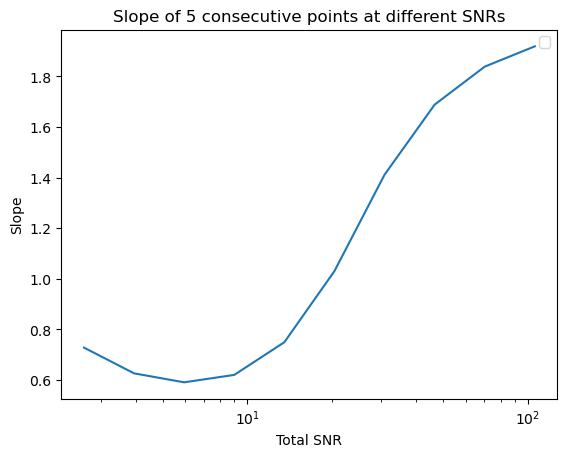

In [16]:
slope_arr = []
sort_idx = np.argsort(SNR200)
log_snr = np.log10(SNR200[sort_idx])
log_BF = np.log10((evidence220_200-evidence220)[sort_idx])
for i in range(len(SNRtot)//5):
    slope, _ = np.polyfit(log_snr[5*i:5*i+5], log_BF[5*i:5*i+5], deg=1, cov=False)
    slope_arr.append(slope)
pl.semilogx(10**log_snr[::5], slope_arr)

pl.title("Slope of 5 consecutive points at different SNRs")
pl.xlabel("Total SNR")
pl.ylabel("Slope")
pl.legend()

Text(0, 0.5, 'ln(evidence) of nofilter')

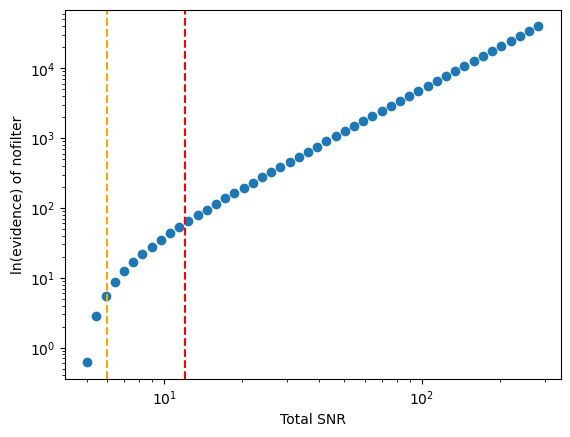

In [17]:
pl.loglog(SNRtot, -nofilter, 'o', c='tab:blue')
pl.axvline(6, c='orange', ls='--')
pl.axvline(12, c='r', ls='--')
pl.xlabel("Total SNR")
pl.ylabel("ln(evidence) of nofilter")

In [20]:
# slope_arr = []
# sort_idx = np.argsort(SNRtot)
# log_snr = np.log10(SNRtot[sort_idx])
# log_BF = np.log10((-nofilter)[sort_idx])
# for i in range(len(SNRtot)//5):
#     slope, _ = np.polyfit(log_snr[5*i:5*i+5], log_BF[5*i:5*i+5], deg=1, cov=False)
#     slope_arr.append(slope)
# pl.semilogx(10**log_snr[::5], slope_arr)

# # pl.title("Slope of 5 consecutive points at different SNRs")
# # pl.xlabel("Total SNR")
# # pl.ylabel("Slope")
# # pl.legend()

# slope_arr1 = []
# sort_idx = np.argsort(SNRtot)
# log_snr = np.log10(SNRtot[sort_idx])
# log_BF = np.log10((evidence220_200-nofilter)[sort_idx])
# for i in range(len(SNRtot)//5):
#     slope, _ = np.polyfit(log_snr[5*i:5*i+5], log_BF[5*i:5*i+5], deg=1, cov=False)
#     slope_arr1.append(slope)
# pl.semilogx(10**log_snr[::5], slope_arr1)

# # pl.semilogx(10**log_snr[::5], np.divide(slope_arr1,slope_arr))

# pl.title("Slope of 5 consecutive points at different SNRs")
# pl.xlabel("Total SNR")
# pl.ylabel("Slope")
# pl.legend()

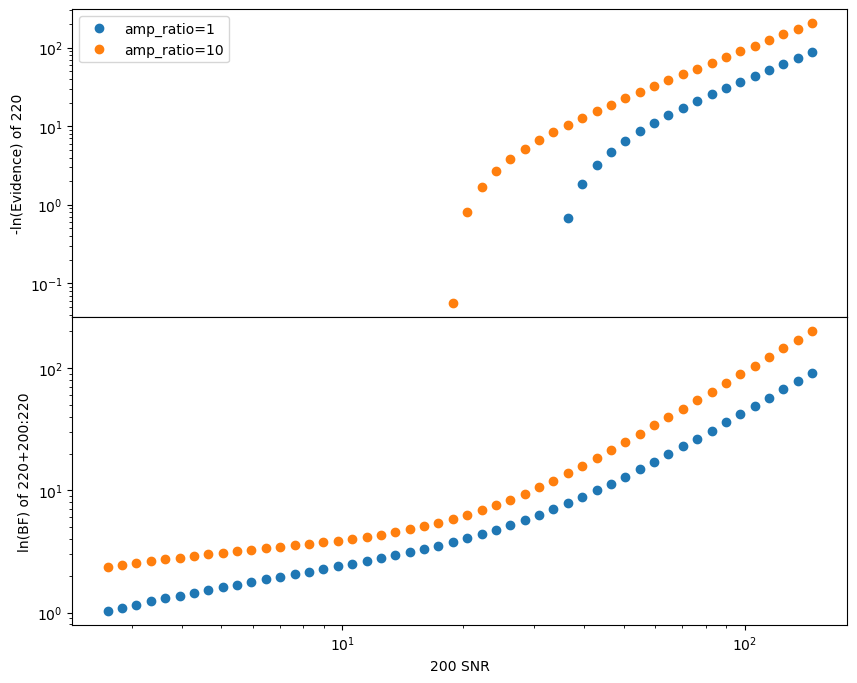

In [43]:
fig, axs = pl.subplots(2, figsize=(10,8), sharex = True)
pl.subplots_adjust(wspace=0, hspace=0)

result = np.loadtxt('./results/200_amp_ratio=1_ALL.dat')
[SNRtot, SNR200, SNR220, evidence220, evidence200, evidence220_200, nofilter] = result.T
axs[0].loglog(SNR200, -evidence220, 'o', label='amp_ratio=1')
axs[0].set_ylabel("-ln(Evidence) of 220")

axs[1].loglog(SNR200, evidence220_200-evidence220, 'o')
axs[1].set_ylabel("ln(BF) of 220+200:220")
axs[1].set_xlabel("200 SNR")

result = np.loadtxt('./results/200_amp_ratio=10_ALL.dat')
[SNRtot, SNR200, SNR220, evidence220, evidence200, evidence220_200, nofilter] = result.T
axs[0].loglog(SNR200, -evidence220, 'o', label='amp_ratio=10')
axs[1].loglog(SNR200, evidence220_200-evidence220, 'o')
axs[0].legend()

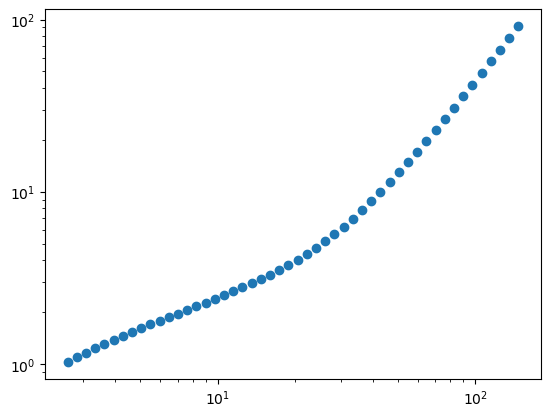

In [36]:
pl.loglog(SNR200, evidence220_200 - evidence220, 'o', c='tab:blue')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


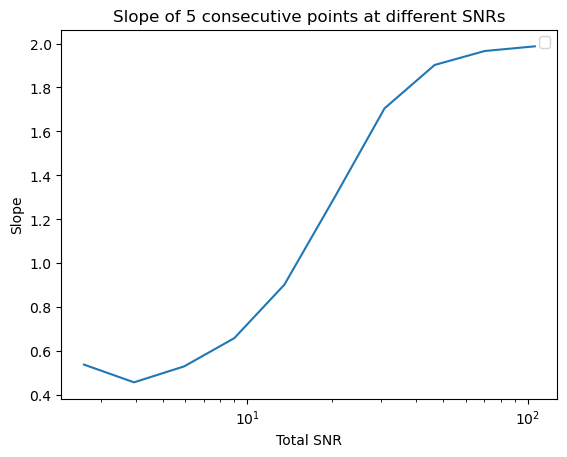

In [8]:
slope_arr = []
sort_idx = np.argsort(SNR200)
log_snr = np.log10(SNR200[sort_idx])
log_BF = np.log10((evidence220_200-evidence330)[sort_idx])
for i in range(len(SNRtot)//5):
    slope, _ = np.polyfit(log_snr[5*i:5*i+5], log_BF[5*i:5*i+5], deg=1, cov=False)
    slope_arr.append(slope)
pl.semilogx(10**log_snr[::5], slope_arr)

pl.title("Slope of 5 consecutive points at different SNRs")
pl.xlabel("Total SNR")
pl.ylabel("Slope")
pl.legend()

## Diff amp_ratio

In [35]:
result = np.loadtxt('./results/200_amp_ratio=0.1_ALL.dat')
[SNRtot, SNR200, SNR220, evidence220, evidence200, evidence220_200, nofilter] = result.T

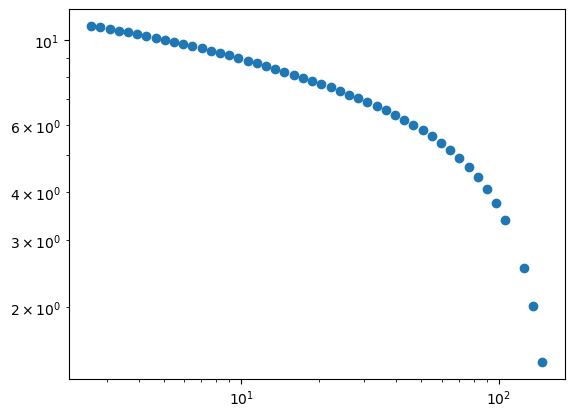

In [36]:
pl.loglog(SNR200, evidence220, 'o')

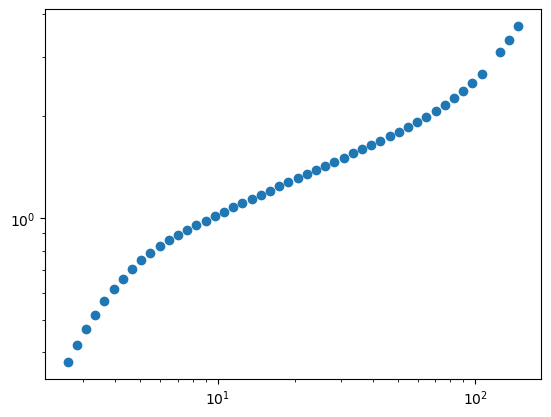

In [38]:
pl.loglog(SNR200, evidence220_200-evidence200, 'o')